### This file is about mellat bank legal customer's clustering that is done by kmeans alghorithm. 

In [2]:
# read csv data using pandas library
%%time
import pandas as pd
df=pd.read_csv('data_manabe.csv')
df.head()

UsageError: Line magic function `%%time` not found.


In [3]:
# get shape of the data
df.shape

NameError: name 'df' is not defined

In [4]:
df.columns

NameError: name 'df' is not defined

# preprocessing

In [5]:
#drop redundant columns from data
df=df.drop(['Unnamed: 0','sex', 'age',
       'issuedate'],axis=1)
df

NameError: name 'df' is not defined

## describing columns
### extcustid: شماره مشتری
### transyear: سال تراکنش
### transmonth: ماه تراکنش
### distinct_cr_day: در طی آن ماه و سال چند روز تراکنش واریز داشته است
### distinct_db_day: در طی آن ماه و سال چند روز تراکنش برداشت داشته است 
### distinct_accno: تعداد حسابهای منحصر به فردی که در آن  ماه و سال با آنها تراکنش انجام داده است
### sum_db: جمع مبالغ برداشت در طی آن ماه و سال
### sum_cr: جمع مبالغ واریز در طی آن ماه و سال
### cnt_db: تعداد برداشت متناظر با جمع مبالغ برداشت
### cnt_cr: تعداد واریز متناظر با جمع مبالغ واریز

In [12]:
%%time
# for clustering we need to group by transactions per custid by sum aggregation function
df=df.groupby(['extcustid']).agg({'distinct_cr_day':['sum'], 
                                                   'distinct_db_day':['sum'],
                                                   'distinct_accno':['sum'],
                                                   'sum_db':['sum'],
                                                   'sum_cr':['sum'],
                                                   'cnt_db':['sum'],
                                                   'cnt_cr':['sum'],                                 
                                  })
df=df.reset_index()
df

NameError: name 'df' is not defined

In [11]:
df.columns

NameError: name 'df' is not defined

In [10]:
# (         'sum_cr', 'sum'),(         'cnt_db', 'sum') are large scale and we should scale them using log scale
import numpy as np
df['sum_cr_sum_log']=np.log(df[('sum_cr','sum')]+0.1)
df['sum_db_sum_log']=np.log(df[('sum_db','sum')]+0.1)

NameError: name 'df' is not defined

In [12]:
df

,extcustid,distinct_cr_day,distinct_db_day,distinct_accno,sum_db,sum_cr,cnt_db,cnt_cr,sum_cr_sum_log,sum_db_sum_log
,,sum,sum,sum,sum,sum,sum,sum,,
0,1.139133e+06,26,3,26,1.498120e+05,2.596760e+05,4,26,12.467190,11.917137
1,1.151883e+06,29,0,22,0.000000e+00,6.145816e+06,0,52,15.631282,-2.302585
2,1.266633e+06,101,251,35,9.628645e+09,9.580048e+09,888,130,22.982948,22.988008
3,1.279383e+06,29,87,11,1.937915e+09,1.937965e+09,270,31,21.384904,21.384879
4,1.292133e+06,14,71,14,5.261613e+08,5.327780e+08,261,16,20.093615,20.081118
...,...,...,...,...,...,...,...,...,...,...
611336,3.563171e+14,51,0,24,0.000000e+00,3.580031e+07,0,51,17.393467,-2.302585
611337,3.563171e+14,334,671,53,1.758110e+10,1.639403e+10,2548,534,23.520183,23.590090
611338,3.563171e+14,71,122,26,1.712000e+09,1.712094e+09,203,103,21.260983,21.260928


In [13]:
# after log scale the two columns we should drop main two columns related them and maintain log scaled columns and replaced df with df1
df1=df.drop([ (         'sum_db', 'sum'),
              (         'sum_cr', 'sum')],axis=1)
df1

,extcustid,distinct_cr_day,distinct_db_day,distinct_accno,cnt_db,cnt_cr,sum_cr_sum_log,sum_db_sum_log
,,sum,sum,sum,sum,sum,,
0,1.139133e+06,26,3,26,4,26,12.467190,11.917137
1,1.151883e+06,29,0,22,0,52,15.631282,-2.302585
2,1.266633e+06,101,251,35,888,130,22.982948,22.988008
3,1.279383e+06,29,87,11,270,31,21.384904,21.384879
4,1.292133e+06,14,71,14,261,16,20.093615,20.081118
...,...,...,...,...,...,...,...,...
611336,3.563171e+14,51,0,24,0,51,17.393467,-2.302585
611337,3.563171e+14,334,671,53,2548,534,23.520183,23.590090
611338,3.563171e+14,71,122,26,203,103,21.260983,21.260928


### now the data is ready for clustering 

# Clustering

In [13]:
# for clustering we should drop extcustid from data
df_for_clustering=df1.drop(['extcustid'],axis=1)
df_for_clustering

NameError: name 'df1' is not defined

### import libraries

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN 
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score,adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
import seaborn as sns
import tarfile
import urllib

### finding the best k in k-means clustering
### here we use elbow method for finding best k

### Elbow method

In [16]:
def find_best_clusters(df, maximum_K):
    
    clusters_centers = []
    k_values = []
    
    for k in range(1, maximum_K):
        
        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df)
        
        clusters_centers.append(kmeans_model.inertia_)
        k_values.append(k)
        
    
    return clusters_centers, k_values

In [17]:
def generate_elbow_plot(clusters_centers, k_values):
    
    figure = plt.subplots(figsize = (12, 6))
    plt.plot(k_values, clusters_centers, 'o-', color = 'orange')
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Cluster Inertia")
    plt.title("Elbow Plot of KMeans")
    plt.show()

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\clust

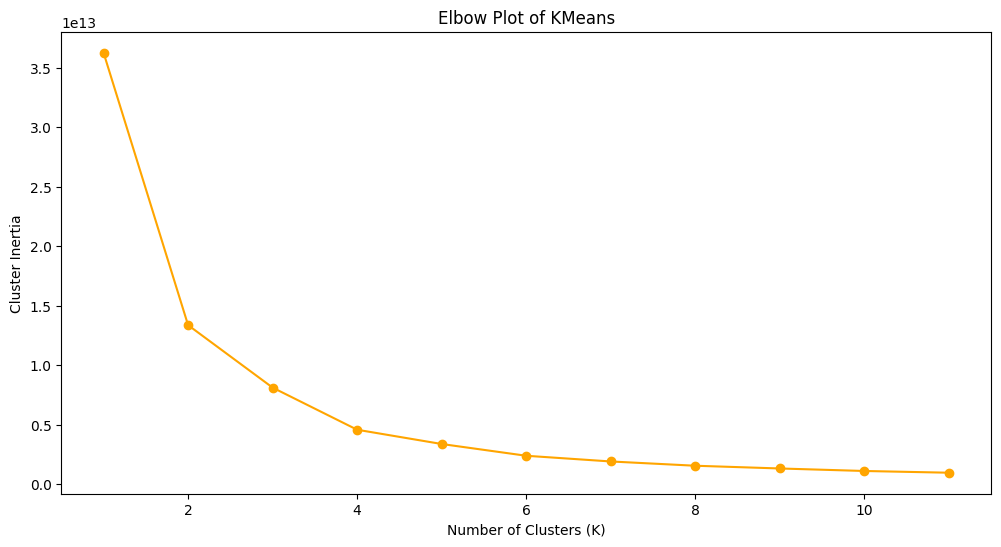

In [18]:
#clusters_centers, k_values = find_best_clusters(scaled_data, 12)
clusters_centers, k_values = find_best_clusters(df_for_clustering,12)
generate_elbow_plot(clusters_centers, k_values)

In [19]:
def clusters(df):
    best_k =3 # according to shape we chose k=3 as a best k
    scaler = StandardScaler()# befor clustering we should scale data, here we use standard scaler
    scaled_features = scaler.fit_transform(df)# fit scale variable on df
    df=df.to_numpy()
    kmeans_kwargs = {"init" : "random" , "n_init":10 , "max_iter":300 , "random_state":42 }
    kmeans = KMeans (n_clusters = best_k , **kmeans_kwargs )
    label = kmeans.fit_predict(scaled_features)
    return label    

In [20]:
%%time
# apply clusters function to df_for_clustering
clusters(df_for_clustering)

CPU times: total: 48 s
Wall time: 7.49 s


array([1, 1, 0, ..., 0, 0, 0])

### In this level we want to plot heatmap to visualize customer's pattern in every cluster

In [28]:
df.columns

MultiIndex([(      'extcustid',    ''),
            ('distinct_cr_day', 'sum'),
            ('distinct_db_day', 'sum'),
            ( 'distinct_accno', 'sum'),
            (         'sum_db', 'sum'),
            (         'sum_cr', 'sum'),
            (         'cnt_db', 'sum'),
            (         'cnt_cr', 'sum'),
            ( 'sum_cr_sum_log',    ''),
            ( 'sum_db_sum_log',    '')],
           )

In [29]:
# for plotting heatmap, we need main columns not scaled columns, so we should drop redundant columns.
df2=df.drop(['extcustid',( 'sum_cr_sum_log',    ''),
            ( 'sum_db_sum_log',    '')
            ],axis=1)
df2

C:\Users\a.yaghobi\AppData\Local\Temp\2\ipykernel_11408\1664805760.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df2=df.drop(['extcustid',( 'sum_cr_sum_log',    ''),


,distinct_cr_day,distinct_db_day,distinct_accno,sum_db,sum_cr,cnt_db,cnt_cr
,sum,sum,sum,sum,sum,sum,sum
0,26,3,26,1.498120e+05,2.596760e+05,4,26
1,29,0,22,0.000000e+00,6.145816e+06,0,52
2,101,251,35,9.628645e+09,9.580048e+09,888,130
3,29,87,11,1.937915e+09,1.937965e+09,270,31
4,14,71,14,5.261613e+08,5.327780e+08,261,16
...,...,...,...,...,...,...,...
611336,51,0,24,0.000000e+00,3.580031e+07,0,51
611337,334,671,53,1.758110e+10,1.639403e+10,2548,534
611338,71,122,26,1.712000e+09,1.712094e+09,203,103


In [30]:
# for heatmap we need columns as clusters columns, so we make a new column ie clusters and attach it to df2
df2['clusters']=clusters(df_for_clustering)
# count number of customers in every cluster
df2['clusters'].value_counts()

0    391600
2    129775
1     89966
Name: clusters, dtype: int64

In [31]:
df2

,distinct_cr_day,distinct_db_day,distinct_accno,sum_db,sum_cr,cnt_db,cnt_cr,clusters
,sum,sum,sum,sum,sum,sum,sum,
0,26,3,26,1.498120e+05,2.596760e+05,4,26,1
1,29,0,22,0.000000e+00,6.145816e+06,0,52,1
2,101,251,35,9.628645e+09,9.580048e+09,888,130,0
3,29,87,11,1.937915e+09,1.937965e+09,270,31,0
4,14,71,14,5.261613e+08,5.327780e+08,261,16,0
...,...,...,...,...,...,...,...,...
611336,51,0,24,0.000000e+00,3.580031e+07,0,51,1
611337,334,671,53,1.758110e+10,1.639403e+10,2548,534,2
611338,71,122,26,1.712000e+09,1.712094e+09,203,103,0


In [34]:
# we use mean agg function for heatmap plot, for plotting heatmap we need to pivot df based on an index column(clusters columns).
data=pd.pivot_table(df2,aggfunc='mean',columns=['clusters'])
data

,clusters,0,1,2
cnt_cr,sum,7.486740e+01,1.633483e+01,1.924475e+03
cnt_db,sum,3.177175e+02,2.911189e+00,1.946148e+03
distinct_accno,sum,2.399442e+01,1.061854e+01,4.744405e+01
distinct_cr_day,sum,5.599096e+01,1.126016e+01,3.136369e+02
distinct_db_day,sum,1.261437e+02,1.996065e+00,4.915802e+02
sum_cr,sum,2.816175e+09,4.265259e+06,3.755823e+10
sum_db,sum,2.788647e+09,1.782801e+06,3.735283e+10


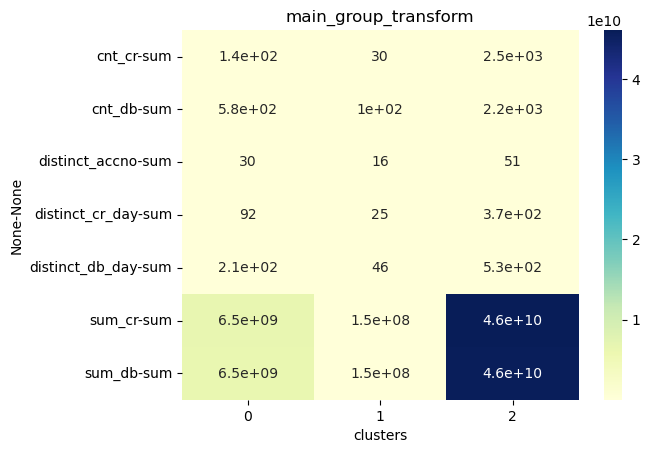

In [26]:
# plot 
a=sns.heatmap(data, annot=True,cmap='YlGnBu')
plt.title("main_group_transform")
#plt.show()
#a.savefig('log&cast.png')
figure = a.get_figure()    
figure.savefig('main_group_transform.png')